### Practica 2 VISION POR COMPUTADOR TAREA 2

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

In [7]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)

Contar el número de píxeles no nulos por columna y visualizar

(array([ 92,  99, 104, 115, 119, 383]), np.float64(0.365234375))

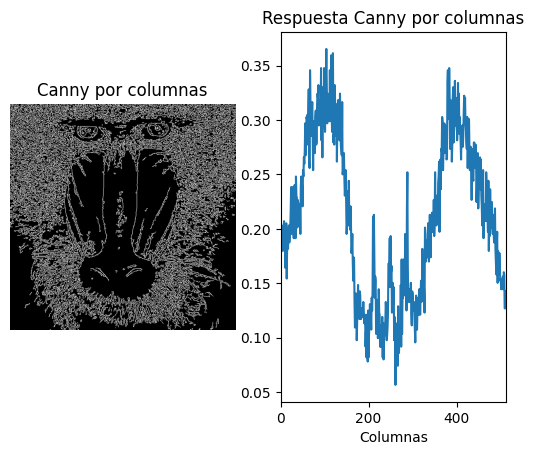

In [11]:
def CannyToColPlot(canny, title="Canny"):
    # Cuenta el número de píxeles blancos (255) por columna.
    col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

    # Normaliza los valores en base al número de filas.
    cols = col_counts[0] / (255 * canny.shape[0])

    # Determina el valor máximo de píxeles blancos por columna.
    maxcol = np.max(cols)

    # Encuentra las columnas con un número de píxeles blancos mayor o igual que 0.95 * maxcol
    threshold = 0.95 * maxcol
    columnas_con_maximos = np.where(cols >= threshold)[0]

       # Muestra el resultado gráficamente
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.title("Canny por columnas")
    plt.imshow(canny, cmap='gray')
    
    # Muestra el resultado gráficamente
    plt.subplot(1, 2, 2)
    plt.title(f"Respuesta {title} por columnas")
    plt.xlabel("Columnas")
    plt.ylabel("% píxeles")
    plt.plot(cols)
    plt.xlim([0, canny.shape[1]])

    return columnas_con_maximos, maxcol
CannyToColPlot(canny)

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

Valor máximo de píxeles blancos por fila: 0.4296875
Número de filas con más del 95% del valor máximo: 2
Posiciones de las filas con más del 95% del valor máximo: [ 12 100]


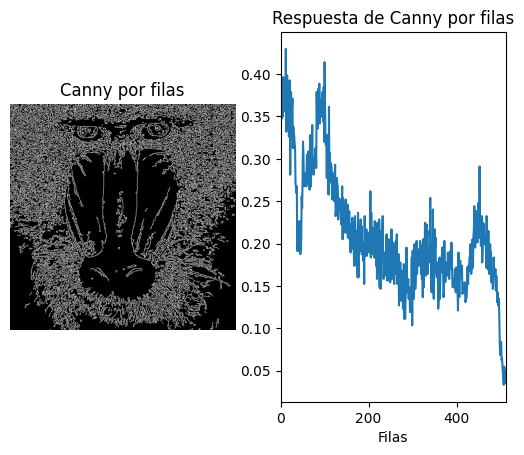

In [12]:
def CannyToRowPlot(canny):
    # Cuenta el número de píxeles blancos (255) por fila, el 1 indica que es por filas. Primero los computa y después lo simplifica en un solo entero
    row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
    """"
    Notas ==> : implica que toma TODOS los valores (Al fin y al cabo es un array de arrays, toma el primer valor, y único, de cada array)
                Se obtiene un array de longitud igual al alto, porque se evalúa por columnas. 
                Cada valor representa el número de píxeles blancos por columnas.
            
    """
    rows = row_counts[:, 0] / (255 * canny.shape[1])

    # Determina el valor máximo de píxeles blancos por fila.
    maxfil = np.max(rows)

    # Encuentra las filas con un número de píxeles blancos mayor o igual que 0.95 * maxfil
    threshold = 0.95 * maxfil
    filas_con_maximos = np.where(rows >= threshold)[0] # Se toma el cero porque la función np.where() devuelve un objeto array con listas dentro.

    # Muestra el resultado gráficamente
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.title("Canny por filas")
    plt.imshow(canny, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Respuesta de Canny por filas")
    plt.xlabel("Filas")
    plt.ylabel("% píxeles")
    plt.plot(rows)

    plt.xlim([0, canny.shape[0]])

    # Imprime los resultados
    print(f"Valor máximo de píxeles blancos por fila: {maxfil}")
    print(f"Número de filas con más del 95% del valor máximo: {len(filas_con_maximos)}")
    print(f"Posiciones de las filas con más del 95% del valor máximo: {filas_con_maximos}")
    
CannyToRowPlot(canny)

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?